In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\safa\\Downloads\day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data:

instant: record index

dteday : date

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are divided to 39 (max)

atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [4]:
data.shape

(731, 16)

In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Converting dteday to datetime



In [6]:
data['dteday'] = pd.to_datetime(data['dteday'])


In [7]:
data.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

extracting date from dteday to check if cnt(bike rental count) has any relationship with day(date)



In [8]:
data['day'] = data['dteday'].dt.day


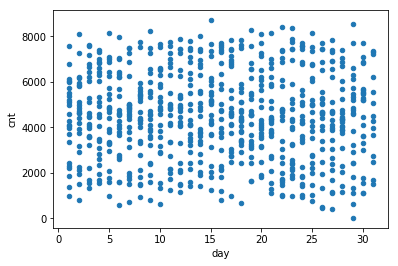

In [9]:
data.plot.scatter('day','cnt')


Day has no relationship with cnt

1)so dropping the dteday (already yr and month are present)

2) dropping casual & registered (only cnt is taken as dependent variable) variables

3)dropping instant as it indicates the index of records

In [10]:
data = data.drop(['instant','dteday','day','casual','registered'],axis=1)

In [11]:
data.shape

(731, 12)

In [12]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


# MISSING VALUE ANALYSIS

In [13]:
data.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

From the above it is clear that given data is has no missing values

In [14]:
data.temp = data.temp *(39-(-8))+(-8)  #de-normalizing the temperature
data.atemp = data.atemp*(50-(-16))+(-16)   #de-normalizing the absolute temperature

data.hum = data.hum*100          #de-normalizing the humidity
data.windspeed = data.windspeed*67   #de-normalizing the windspeed

In [15]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,985
1,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,801
2,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,1600


# Data Distribution


Distribution of target variable 'cnt' represents the total number of bikes rented on a given day

In [16]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


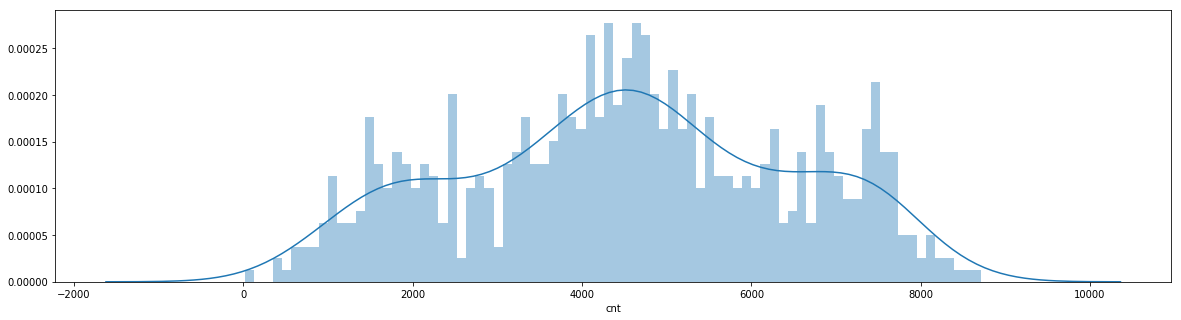

In [17]:
# The distribution of this variabe is almost normal
f, ax = plt.subplots(figsize= (20,5))
sns.distplot(data.cnt, bins= 80)

Distribution of continuous variables

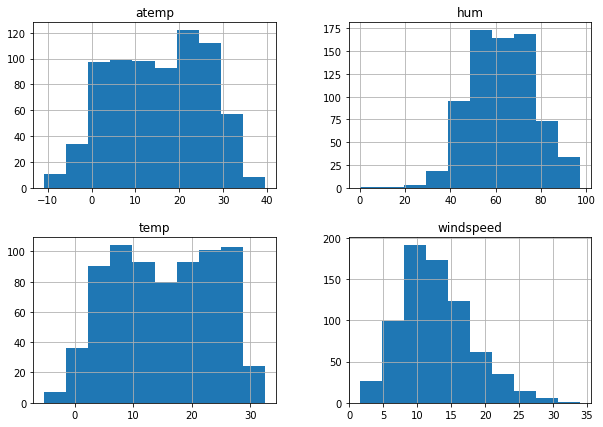

In [18]:
data[['temp','atemp','windspeed','hum']].hist(figsize= (10,7))
plt.show()

# Distribution of Catagorical variables

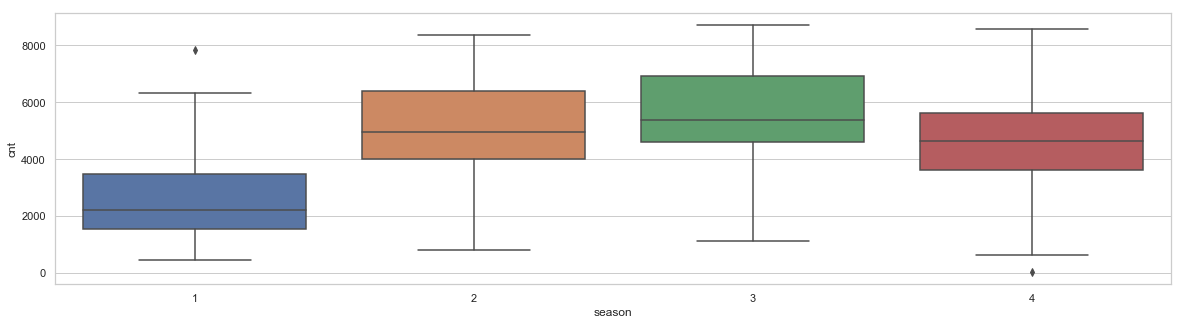

In [19]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="season", y="cnt", data=data)

In [20]:
import seaborn as sns

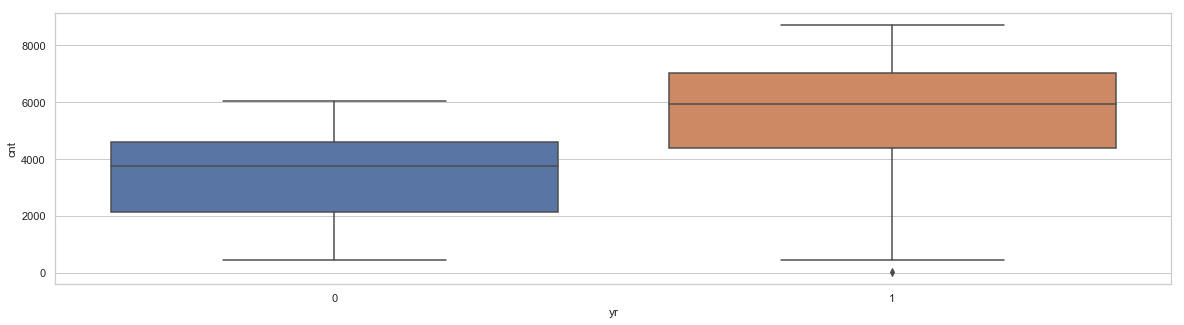

In [21]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="yr", y="cnt", data=data)

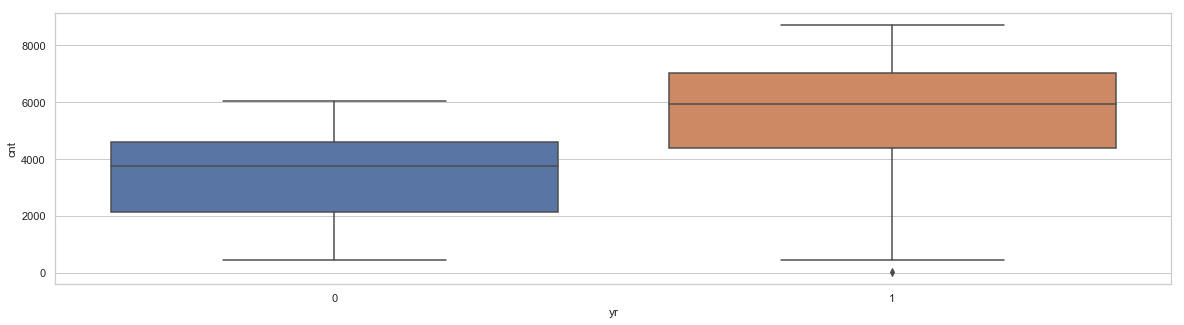

In [22]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="yr", y="cnt", data=data)

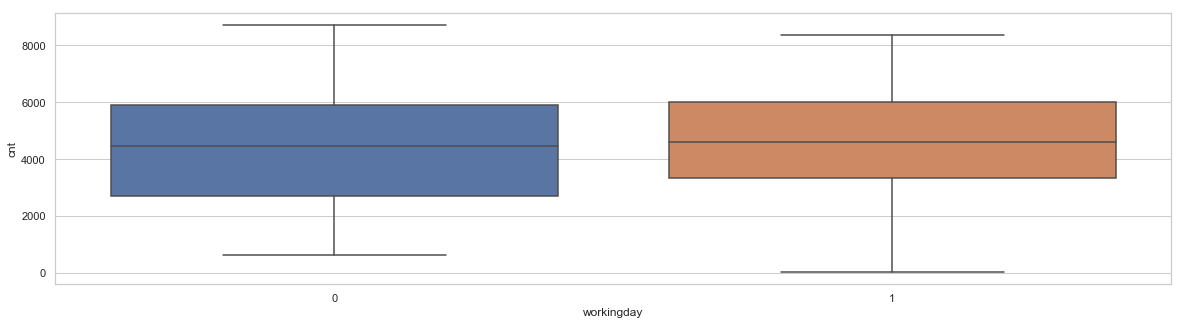

In [23]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="workingday", y="cnt", data=data)

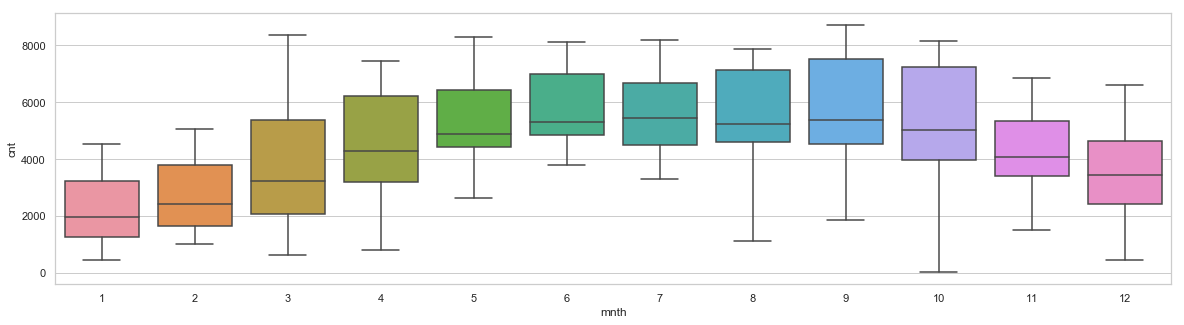

In [24]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="mnth", y="cnt", data=data)

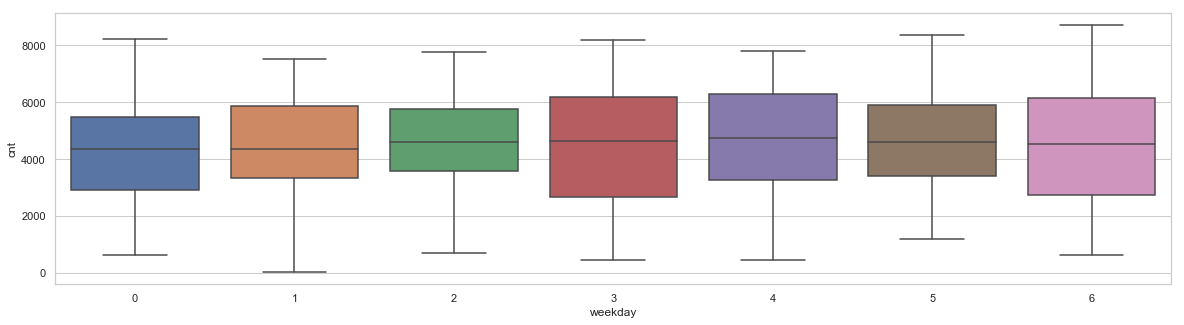

In [25]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="weekday", y="cnt", data=data)

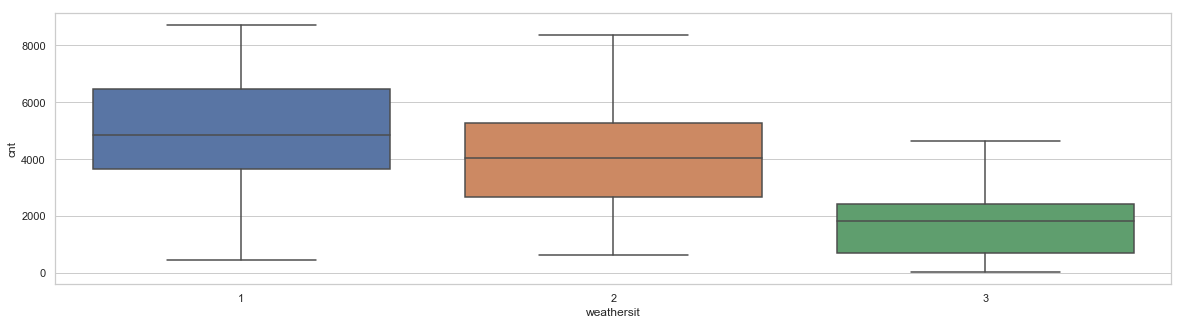

In [26]:
fig = plt.figure(figsize=(20, 5))
sns.set(style="whitegrid")
ax = sns.boxplot(x="weathersit", y="cnt", data=data)

In [27]:
data.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Outlier Analysis


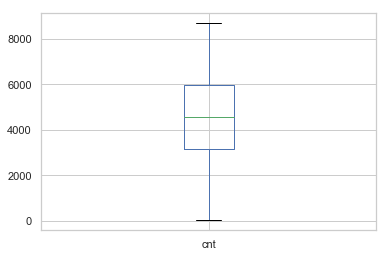

In [28]:
boxplot = data.boxplot(column=['cnt'])

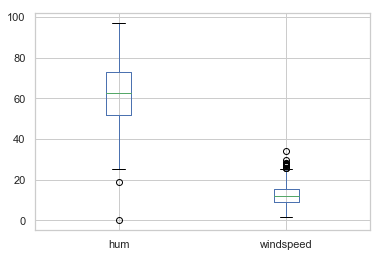

In [29]:
boxplot = data.boxplot(column=['hum','windspeed'])

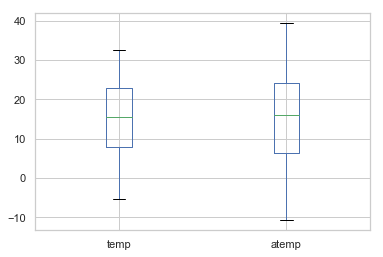

In [30]:
boxplot = data.boxplot(column=['temp', 'atemp'])

In [31]:
num_var = ["cnt","windspeed","hum","temp","atemp"]

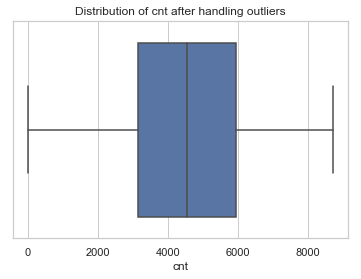

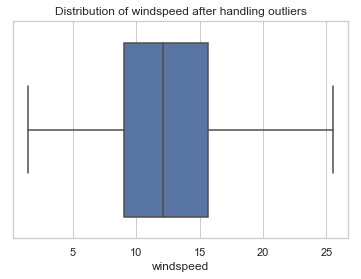

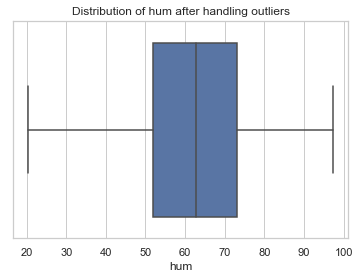

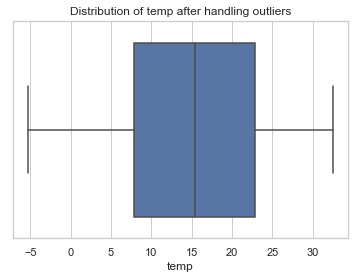

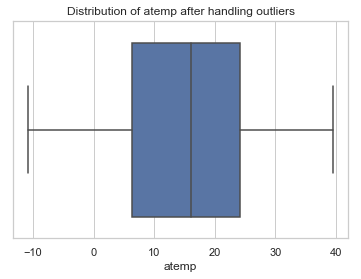

In [32]:
for i in num_var:
    
    #Calculating 25th quartile and 75th quartile
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75 - q25
    
    min = q25 - (1.5*iqr)
    max = q75 + (1.5*iqr)
    
    
    data.loc[data.loc[:,i]<min,i] = min
    data.loc[data.loc[:,i]>max,i] = max
    
    plt.figure()
    sns.boxplot(data[i]).set_title("Distribution of " + i + " after handling outliers")

# correlation

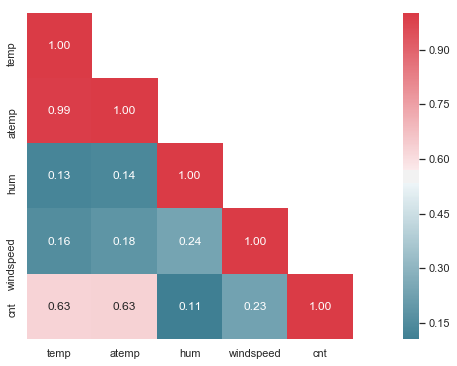

In [33]:
con = ['temp', 'atemp', 'hum', 'windspeed',  'cnt']

df_con = data.loc[:,con]

f, ax = plt.subplots(figsize=(18,6))
corr = df_con.corr().abs()

# Select upper triangle of correlation matrix
lower = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))

sns.heatmap(lower,mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True), square = True, annot=True, fmt=".2f", ax = ax)
plt.show()

In [34]:
print(corr)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126722   0.156916  0.627494
atemp      0.991702  1.000000  0.139924   0.182948  0.631066
hum        0.126722  0.139924  1.000000   0.241160  0.105664
windspeed  0.156916  0.182948  0.241160   1.000000  0.233657
cnt        0.627494  0.631066  0.105664   0.233657  1.000000


In [35]:
corr['temp'].abs().sort_values(ascending=False)


temp         1.000000
atemp        0.991702
cnt          0.627494
windspeed    0.156916
hum          0.126722
Name: temp, dtype: float64

From the above heatmap,it is clear that temp and atemp are highly correlated,so considering one of them would be enough

therefore dropping "atemp"

In [36]:
data = data.drop(['atemp'],axis=1)

In [37]:
data.shape

(731, 11)

In [38]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,8.175849,80.5833,10.749882,985.0
1,1,0,1,0,0,0,2,9.083466,69.6087,16.652113,801.0
2,1,0,1,0,1,1,1,1.229108,43.7273,16.636703,1349.0
3,1,0,1,0,2,1,1,1.400000,59.0435,10.739832,1562.0
4,1,0,1,0,3,1,1,2.666979,43.6957,12.522300,1600.0


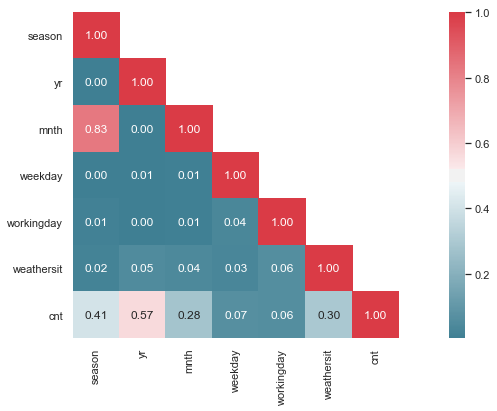

In [39]:
cat = ['season', 'yr', 'mnth', 'weekday',  'workingday','weathersit','cnt']

df_cat = data.loc[:,cat]

f, ax = plt.subplots(figsize=(18,6))
corr = df_cat.corr().abs()

# Select upper triangle of correlation matrix
lower = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))

sns.heatmap(lower,mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True), square = True, annot=True, fmt=".2f", ax = ax)
plt.show()

In [40]:
corr['season'].abs().sort_values(ascending=False)


season        1.000000
mnth          0.831440
cnt           0.406100
weathersit    0.019211
workingday    0.012485
weekday       0.003080
yr            0.001844
Name: season, dtype: float64

From the above heatmap,it is clear that month and season are highly correlated,so considering one of them would be enough

therefore dropping "mnth"

In [41]:
data = data.drop(['mnth'],axis=1)

After dropping highly correlated variables,heatmap is shown below for entire data

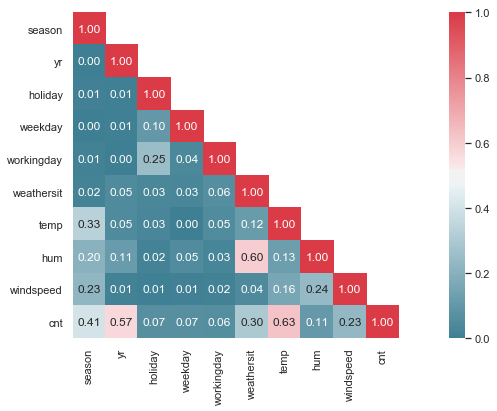

In [42]:
con = ['season', 'yr', 'holiday', 'weekday',  'workingday','weathersit','temp','hum','windspeed','cnt']

df_con = data.loc[:,con]

f, ax = plt.subplots(figsize=(18,6))
corr = df_con.corr().abs()

# Select upper triangle of correlation matrix
lower = corr.where(np.tril(np.ones(corr.shape), k=0).astype(np.bool))

sns.heatmap(lower,mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220,10,as_cmap = True), square = True, annot=True, fmt=".2f", ax = ax)
plt.show()

In [43]:
data.shape

(731, 10)

In [44]:
data.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,6,0,2,8.175849,80.5833,10.749882,985.0
1,1,0,0,0,0,2,9.083466,69.6087,16.652113,801.0
2,1,0,0,1,1,1,1.229108,43.7273,16.636703,1349.0
3,1,0,0,2,1,1,1.400000,59.0435,10.739832,1562.0
4,1,0,0,3,1,1,2.666979,43.6957,12.522300,1600.0


# feature scaling

In [45]:
data.temp = (data.temp-(data.temp.min()))/((data.temp.max())-(data.temp.min()))
data.hum = (data.hum-(data.hum.min()))/((data.hum.max())-(data.hum.min()))
data.windspeed = (data.windspeed-(data.windspeed.min()))/((data.windspeed.max())-(data.windspeed.min()))

# Model Building

In [46]:
data.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,6,0,2,0.355170,0.782933,0.385390,985.0
1,1,0,0,0,0,2,0.379232,0.639999,0.631309,801.0
2,1,0,0,1,1,1,0.171000,0.302920,0.630667,1349.0
3,1,0,0,2,1,1,0.175530,0.502398,0.384971,1562.0
4,1,0,0,3,1,1,0.209120,0.302508,0.459239,1600.0


In [47]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [48]:
data.columns


Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# Linear regression

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
#Divide data into train and test
X = data.values[:, 0:9]
Y = data.values[:,9]
#X= data[['season', 'yr', 'mnth', 'holiday', 'weekday','weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered']]
#Y = data['cnt']

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [51]:
X.shape

(731, 9)

In [52]:
Y.shape

(731,)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [54]:
lr=LinearRegression()
lr.fit(x_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = lr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test))


#R2 score
r=r2_score(y_test,y_pred)


print("Root Mean Squared Error For Test data = "+str(rmse))

print("R^2 Score = "+str(r))

print("Mean Absolute percentage Error For Test data = "+str(mape))



Root Mean Squared Error For Test data = 814.9551633662355
R^2 Score = 0.835151866928076
Mean Absolute percentage Error For Test data = 0.19332299177576065


DECISION TREE# DECISION TREE

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = dt.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

#MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test))

#R2 score
r=r2_score(y_test,y_pred)


print("Root Mean Squared Error For Test data = "+str(rmse))
print("R^2 Score = "+str(r))
print("Mean Absolute percentage Error For Test data = "+str(mape))


Root Mean Squared Error For Test data = 874.8629124875843
R^2 Score = 0.8100249296594711
Mean Absolute percentage Error For Test data = 0.20451252545314363


# Random forest


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500)
rf.fit(x_train,y_train)

#metrics for validation

#RMSE for test data to check accuracy
y_pred = rf.predict(x_test)
test_rmse =np.sqrt(mean_squared_error(y_test,y_pred))

pred_train = rf.predict(x_train) #prediction on train data

train_rmse=np.sqrt(mean_squared_error(y_train, pred_train))

#MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test))

#R2 score
r=r2_score(y_test,y_pred)


print("Root Mean Squared Error For Train data = "+str(train_rmse))
print("Root Mean Squared Error For Test data = "+str(test_rmse))
print("R^2 Score = "+str(r))
print("Mean Absolute percentage Error For Test data = "+str(mape))

Root Mean Squared Error For Train data = 263.2322881108534
Root Mean Squared Error For Test data = 618.4703102212286
R^2 Score = 0.9050588880540931
Mean Absolute percentage Error For Test data = 0.16720383911552616


                     LR          DT                    RF
            
#RMSE.........................814 ...................874 .......................................618


#R^2........................ 0.83 ....................0.81...................................0.90


#MAPE  .....................0.19.................... 0.20 .................................... 0.16

# Random Forest Model with 10-fold cross validation



In [57]:
from sklearn.model_selection import GridSearchCV

# Import the random forest module
from sklearn.ensemble import RandomForestRegressor

r=RandomForestRegressor(random_state=1)
# Define the list of estimators for the Random forest to be built
est=list([100,200,300,400,500,600])
param_grid= dict(n_estimators=est)
print(param_grid)
# instantiate the gridsearch using random forest model
grid_rf = GridSearchCV(r, param_grid, cv=10,scoring='r2', return_train_score=False)
# Fit the random forest grid
grid_rf.fit(x_train,y_train)
#Print the best estimated model
print("The best cross validated estimator of Random Forest is :",grid_rf.best_estimator_)
# Print the best score of r-square
print("The best cross validated r-square of Random Forest is :",grid_rf.best_score_)
#Print the given parameters & corresponding r-square value from each 10-fold cross validation 
pd.DataFrame(grid_rf.cv_results_)[[ 'params','mean_test_score']]


{'n_estimators': [100, 200, 300, 400, 500, 600]}
The best cross validated estimator of Random Forest is : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
The best cross validated r-square of Random Forest is : 0.8541335824599376


,params,mean_test_score
0,{'n_estimators': 100},0.854134
1,{'n_estimators': 200},0.853927
2,{'n_estimators': 300},0.853233
3,{'n_estimators': 400},0.852815
4,{'n_estimators': 500},0.852832
5,{'n_estimators': 600},0.852977


In [58]:
# import MSE function
from sklearn.metrics import mean_squared_error
# Function for calculating MAPE
def mape(act,pred):
    m=np.mean(np.abs((act - pred)/act))*100
    return m

In [59]:
# Predict on the test dataset
predicted_rf=grid_rf.predict(x_test)
# Print the MAPE & RMSE scores
print("The MAPE of Random Forest prediction is : %.4f" %mape(y_test,predicted_rf))
print("The RMSE of Random Forest prediction is : %.4f" %np.sqrt(mean_squared_error(predicted_rf,y_test)))

The MAPE of Random Forest prediction is : 16.7569
The RMSE of Random Forest prediction is : 619.0032
